In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import read_stats, assign_channels, plot_kde
import scipy
from itertools import combinations, product
from tqdm import tqdm
plt.rcParams['figure.figsize'] = [10,10]

In [2]:
channels={1:'CD11c',2:'Ki67',3:'Foxp3',4:'CD3',5:'PD1',6:'autofluorescence',7:'MHCII',8:'CD8a',9:'CD86',10:'CD4',11:'TCF1'}
Tconv_lps1_df=assign_channels(read_stats('LPS1_Tconv_Statistics'),channels)
Tconv_lps1_df['image']='LPS1'
dc_lps1_df=assign_channels(read_stats('LPS1_DC_Statistics'),channels)
dc_lps1_df['image']='LPS1'
Tconv_pbs1_df=assign_channels(read_stats('PBS1_Tconv_Statistics'),channels)
Tconv_pbs1_df['image']='PBS1'
Tconv_lps2_df=assign_channels(read_stats('LPS2_Tconv_Statistics'),channels)
Tconv_lps2_df['image']='LPS2'
Tconv_pbs2_df=assign_channels(read_stats('PBS2_Tconv_Statistics'),channels)
Tconv_pbs2_df['image']='PBS2'
Tconv_dict={'LPS1':Tconv_lps1_df,'PBS1':Tconv_pbs1_df,'LPS2':Tconv_lps2_df,'PBS2':Tconv_pbs2_df}
for condition in Tconv_dict.keys():
    df=Tconv_dict[condition]
    Tconv_dict[condition]=df[df['Intensity_Mean_Foxp3']<0.1]
# Tconv_lps1_df=Tconv_lps1_df[Tconv_lps1_df['Intensity_Mean_Foxp3']<0.1]

# Treg_df1=assign_channels(read_stats('T cell activation\img69_Tregs_Statistics'),channels)
# Treg_df1['image']=69
# Tconv_df2=assign_channels(read_stats('T cell activation\img136_Tconvs_Statistics'),channels)
# Tconv_df2['image']=136
# Treg_df2=assign_channels(read_stats('T cell activation\img136_Tregs_Statistics'),channels)
# Treg_df2['image']=136
# Tconv_df3=assign_channels(read_stats('T cell activation\img137_Tconvs_Statistics'),channels)
# Tconv_df3['image']=137
# Treg_df3=assign_channels(read_stats('T cell activation\img137_Tregs_Statistics'),channels)
# Treg_df3['image']=137

In [4]:
n_T=len(Tconv_lps1_df)
n_DC=len(dc_lps1_df)
dist_container=np.zeros((n_T*n_DC,3))
for i,(tc,dc) in tqdm(enumerate(product(Tconv_lps1_df.iterrows(),dc_lps1_df.iterrows()))):
    dist_container[i,0]=tc[0]
    dist_container[i,1]=dc[0]
    dist_container[i,2]=sum([(tc[1][f'Position_{coord}']-dc[1][f'Position_{coord}'])**2 for coord in ['X','Y','Z']])
tc_dc_lps1_pairs_df=pd.DataFrame(data=dist_container,columns=['tc_id','dc_id','distance_sq'])
tc_dc_lps1_pairs_df=tc_dc_lps1_pairs_df[tc_dc_lps1_pairs_df['distance_sq']<10000]

5425200it [02:04, 43430.03it/s]


In [15]:
len(Tconv_lps1_df)

6850

In [14]:
len(np.unique(np.array(tc_dc_lps1_pairs_df[tc_dc_lps1_pairs_df['distance_sq']<900]['tc_id'],dtype=np.int32)))

6532

(array([ 3978., 12444., 20120., 27985., 35105., 42467., 49498., 56093.,
        62663., 68683.]),
 array([ 0.17166039, 10.15449234, 20.13732429, 30.12015623, 40.10298818,
        50.08582013, 60.06865207, 70.05148402, 80.03431597, 90.01714791,
        99.99997986]),
 <BarContainer object of 10 artists>)

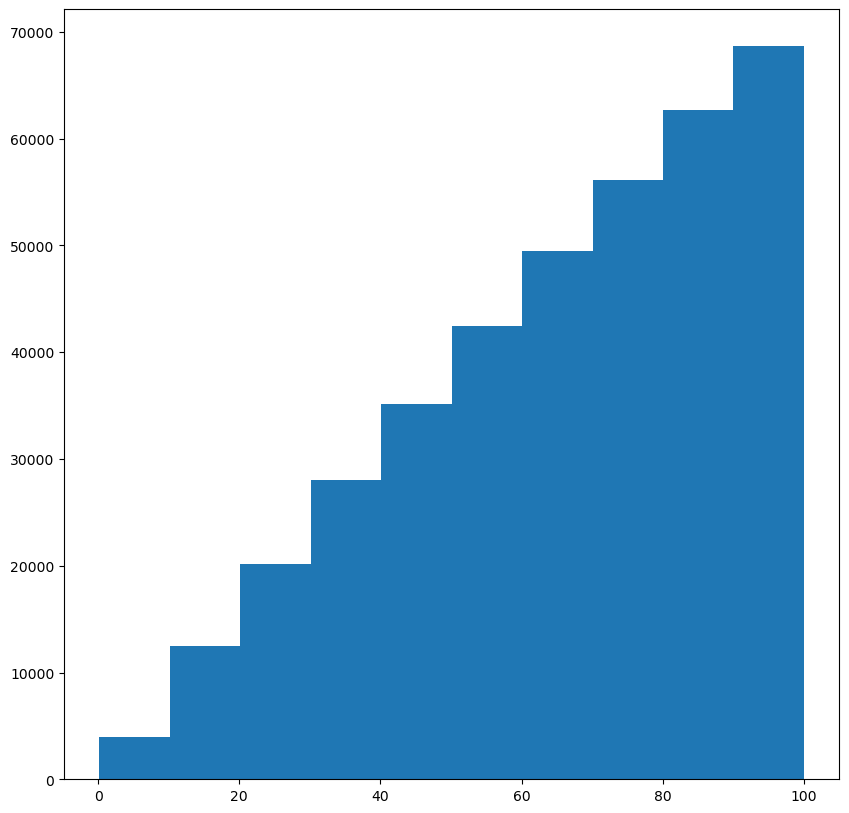

In [5]:
plt.hist(np.sqrt(tc_dc_lps1_pairs_df['distance_sq']))

In [6]:
tc_dc_lps1_pairs_df

,tc_id,dc_id,distance_sq
0,0.0,0.0,247.764133
1,0.0,1.0,609.444160
2,0.0,2.0,1407.875557
3,0.0,3.0,2150.579056
4,0.0,4.0,1509.098327
...,...,...,...
5425195,6849.0,787.0,7307.855967
5425196,6849.0,788.0,6984.566874
5425197,6849.0,789.0,3551.377224
5425198,6849.0,790.0,7.816252


In [7]:
Tconv_df=pd.concat((Tconv_df1,Tconv_df2,Tconv_df3))
Treg_df=pd.concat((Treg_df1,Treg_df2,Treg_df3))

NameError: name 'Tconv_df1' is not defined

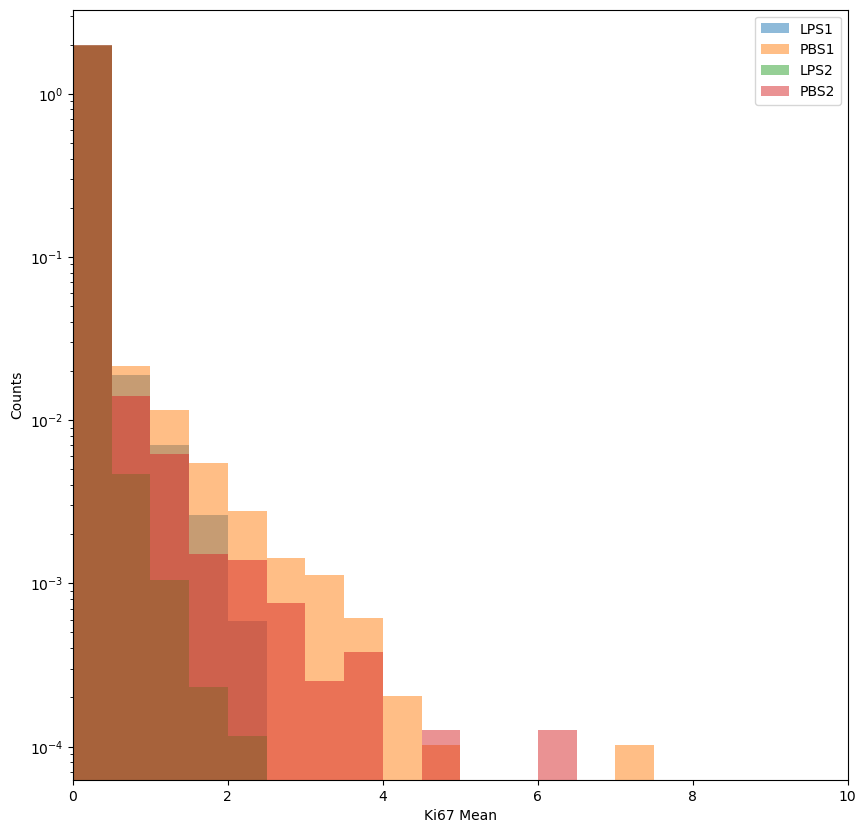

In [ ]:
bins=np.arange(0,10,0.5)
plt.hist(Tconv_lps1_df['Intensity_Mean_Ki67'],bins=bins,alpha=0.5,label='LPS1',density=True)
plt.hist(Tconv_pbs1_df['Intensity_Mean_Ki67'],bins=bins,alpha=0.5,label='PBS1',density=True)
plt.hist(Tconv_lps2_df['Intensity_Mean_Ki67'],bins=bins,alpha=0.5,label='LPS2',density=True)
plt.hist(Tconv_pbs2_df['Intensity_Mean_Ki67'],bins=bins,alpha=0.5,label='PBS2',density=True)
plt.xlabel('Ki67 Mean')
plt.ylabel('Counts')
plt.yscale('log')
plt.xlim(0,10)
plt.legend()

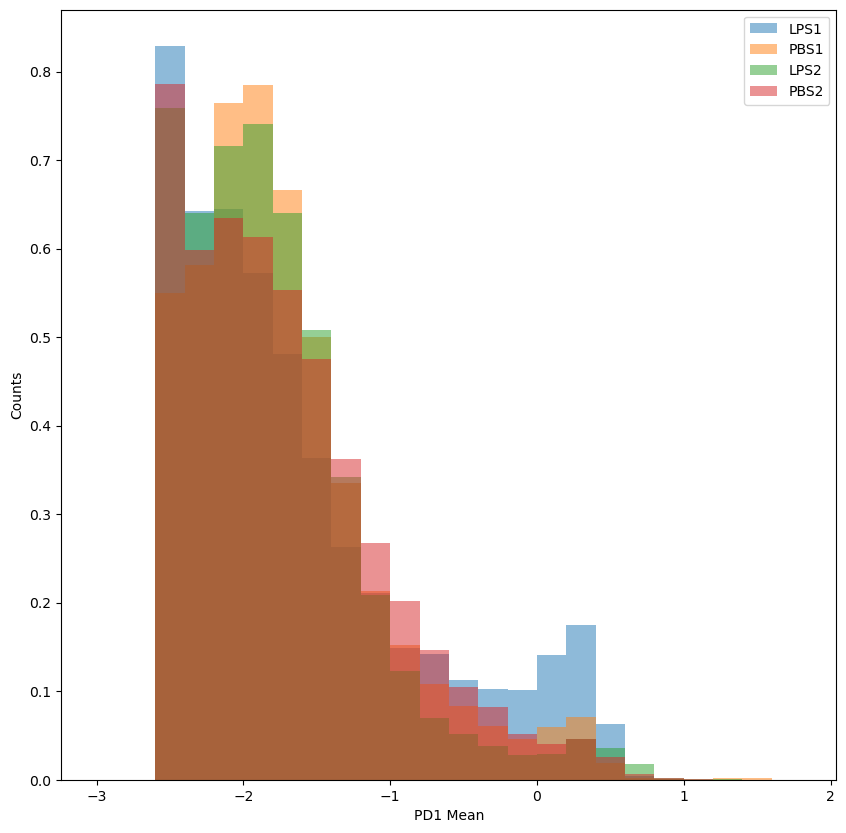

In [ ]:
eps=0.003
bins=np.arange(-3,2,0.2)
plt.hist(np.log10(Tconv_lps1_df['Intensity_Mean_PD1']+eps),bins=bins,alpha=0.5,label='LPS1',density=True)
plt.hist(np.log10(Tconv_pbs1_df['Intensity_Mean_PD1']+eps),bins=bins,alpha=0.5,label='PBS1',density=True)
plt.hist(np.log10(Tconv_lps2_df['Intensity_Mean_PD1']+eps),bins=bins,alpha=0.5,label='LPS2',density=True)
plt.hist(np.log10(Tconv_pbs2_df['Intensity_Mean_PD1']+eps),bins=bins,alpha=0.5,label='PBS2',density=True)
plt.xlabel('PD1 Mean')
plt.ylabel('Counts')
plt.legend()

Gating PD1+ as PD1 mean > 10 ** -0.5 ~= 0.3

In [19]:
for condition in Tconv_dict.keys():
    df=Tconv_dict[condition]
    print(condition, len(df[df['Intensity_Mean_PD1']>0.3])/len(df))

LPS1 0.13066037735849056
PBS1 0.06007699398145638
LPS2 0.04545180541322563
PBS2 0.060189448756742536
